In [207]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numerizer import numerize

In [208]:
header = {
    "User-Agent": "Chrome/124.0.6367.63",
    "Accept-Language": "en-US"
}

In [209]:
URL = 'https://www.slickcharts.com/sp500'

In [210]:
#Geting the data from Slickcharts.com on S&P 500
response = requests.get(URL, headers = header)
website_html = response.text
soup = BeautifulSoup(website_html, "html.parser")
table = soup.find("table", class_="table table-hover table-borderless table-sm")
table_headers =[]
data = []
for th in table.find_all('th'):
    table_headers.append(th.text.strip())
for row in table.find_all('tr'):
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text.strip())
    if row_data:
        data.append(row_data)

df = pd.DataFrame(data, columns= table_headers)
df

,#,Company,Symbol,Portfolio%,Price,Chg,% Chg
0,1,Microsoft Corp,MSFT,7.02%,411.53,4.87,(1.20%)
1,2,Apple Inc.,AAPL,6.18%,180.95,-2.44,(-1.33%)
2,3,Nvidia Corp,NVDA,5.09%,917.92,30.03,(3.38%)
3,4,Amazon.com Inc,AMZN,3.95%,186.78,0.57,(0.31%)
4,5,"Meta Platforms, Inc. Class A",META,2.31%,459.46,7.50,(1.66%)
...,...,...,...,...,...,...,...
497,498,Paramount Global Class B,PARA,0.01%,13.50,0.60,(4.69%)
498,499,"Mohawk Industries, Inc.",MHK,0.01%,117.69,1.32,(1.14%)
499,500,"Bio-Rad Laboratories, Inc.Class A",BIO,0.01%,283.56,3.73,(1.33%)
500,501,Fox Corporation Class B,FOX,0.01%,29.86,0.28,(0.93%)


In [211]:
#Get Information from Wiki about the various background of the companies.
URL2 = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
response = requests.get(URL2, headers = header)
response.status_code
website_html2 = response.text
soup2 = BeautifulSoup(website_html2, "html.parser")
table2 = soup2.find("table", id = "constituents")

wiki_table_headers = []
for th in table2.find_all('th'):
    wiki_table_headers.append(th.text.strip())

wiki_data = []
for row in table2.find_all('tr'):
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text.strip())
    if row_data:
        wiki_data.append(row_data)

df2 = pd.DataFrame(wiki_data, columns= wiki_table_headers)
df2

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...
497,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,0001524472,2011
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927


In [212]:
#Combine the information into one big list
merged_df = pd.merge(df,df2, on="Symbol", sort=True)
merged_df = merged_df.drop(['#'], axis=1)

In [213]:
#Get Market Cap
URL3 = 'https://www.slickcharts.com/sp500/marketcap'
response = requests.get(URL3, headers = header)
response.status_code
website_html3 = response.text
soup3 = BeautifulSoup(website_html3, "html.parser")
market_cap = soup3.find("h2", class_="text-center")

market_cap = market_cap.getText()
market_cap_number = numerize(market_cap)
market_cap_number = int(market_cap_number.replace('$',''))
market_cap_number

42966000000000

In [214]:
portfolio_percentage = list(merged_df['Portfolio%'])


In [215]:
#Do some analysis

#mean Price
merged_df['Price'] = pd.to_numeric(merged_df['Price'], errors= 'coerce')
mean_price = np.nanmean(merged_df['Price'])

#Mean Change
merged_df['Chg'] = pd.to_numeric(merged_df['Chg'], errors='coerce')
mean_change = np.nanmean(merged_df['Chg'])

#Number of Unique Industries
unique_industries = np.unique(merged_df['GICS Sector'])
unique_industries_list = np.unique(merged_df['GICS Sector'])
#unique_industries_list = list(unique_industries_list)
num_unique_industries = len(unique_industries)

#Count number of Companies in each industry
stats_industries = []
for i in range(num_unique_industries):
    count = np.count_nonzero(merged_df['GICS Sector'] ==unique_industries_list[i])
    stats_industries.append(count)

#Number of Unique Sub-Industries
unique_sub_industries = np.unique(merged_df['GICS Sub-Industry'])
num_unique_sub_industries = len(unique_sub_industries)

stats_industries

[22, 52, 38, 22, 71, 64, 79, 65, 28, 31, 30]

([<matplotlib.patches.Wedge at 0x200f9616d50>,
 [Text(1.089590874291785, 0.1509692904536006, 'Communication Services'),
  Text(0.9073827725828281, 0.6218170985264877, 'Consumer Discretionary'),
  Text(0.4352194407811642, 1.0102395945349454, 'Consumer Staples'),
  Text(0.034414172848571796, 1.0994615339824985, 'Energy'),
  Text(-0.5756286592264231, 0.937364201725877, 'Financials'),
  Text(-1.0831554624420192, 0.19176611844122946, 'Health Care'),
  Text(-0.827212798149444, -0.7250648154322255, 'Industrials'),
  Text(0.055048896077840574, -1.0986216905926312, 'Information Technology'),
  Text(0.6499009012554837, -0.8874845455258982, 'Materials'),
  Text(0.9263926626145506, -0.5931244680957983, 'Real Estate'),
  Text(1.0806704996304834, -0.20530774760929413, 'Utilities')],
 [Text(0.5943222950682463, 0.08234688570196397, '4.4%'),
  Text(0.49493605777245164, 0.33917296283262965, '10.4%'),
  Text(0.23739242224427134, 0.5510397788372429, '7.6%'),
  Text(0.018771367008311887, 0.599706291263181,

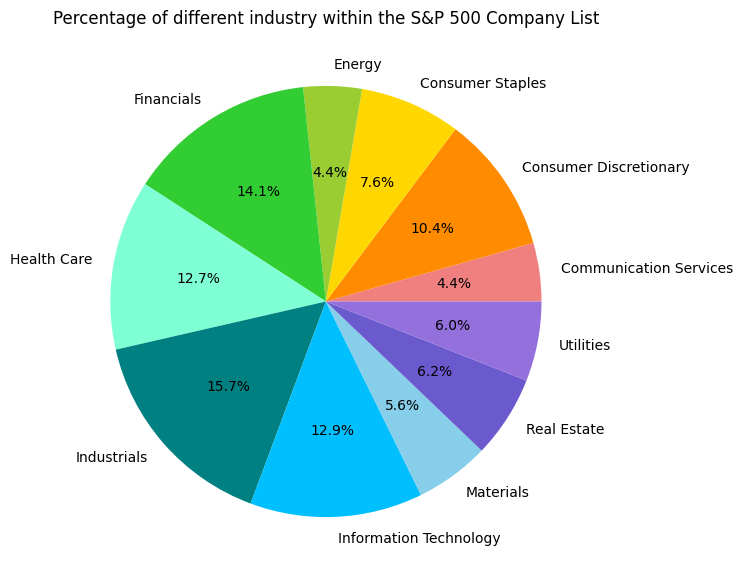

In [216]:
#Creating Pie Chart
fig= plt.figure(figsize=(10,7))
color = ("lightcoral", "darkorange", "gold", "yellowgreen", "limegreen", "aquamarine", "teal", "deepskyblue","skyblue", "slateblue", "mediumpurple")
plt.title("Percentage of different industry within the S&P 500 Company List")
plt.pie(stats_industries, labels = unique_industries_list, autopct='%1.1f%%', colors= color)

[1.54, 0.75, -2.44, -1.67, 2.22, -0.37, 1.96, 1.25, 7.04, 2.9, 0.27, 0.25, 0.55, 0.02, 0.25, 0.25, 1.09, 1.47, 3.76, 3.72, 1.01, 2.19, 0.1, 0.97, 1.47, 3.86, 0.06, 4.36, 1.4, -11.91, 4.55, -2.66, 0.57, 3.94, -0.39, 5.1, 0.85, 0.65, 0.59, 1.3, 4.5, -0.76, -0.05, 2.78, 25.56, 0.2, 0.79, 4.66, 2.16, 17.05, 3.85, 0.42, 0.2, -0.38, 1.44, 0.1, 1.76, 0.07, -0.89, 0.85, 4.13, 3.73, 0.15, 2.41, 0.08, 4.37, 6.72, -0.07, 0.85, 1.87, 0.89, -0.2, 0.54, 2.53, 0.71, 1.21, -0.36, -0.05, 1.85, 5.11, 2.7, 3.5, -0.77, -1.77, 0.19, 2.9, 2.01, 1.03, 2.46, 1.1, 0.35, -0.43, -1.94, 6.5, 1.24, 0.65, 0.08, 0.67, 0.49, -0.18, -0.34, 36.65, 2.67, -0.13, 0.24, -0.11, 1.01, 1.04, 1.53, -0.08, 9.54, 4.66, -0.13, 0.26, 0.45, 2.11, 2.02, 0.02, 0.01, -0.13, 10.38, -0.03, 0.19, 0.07, -0.35, -0.48, 2.13, 0.74, 0.07, 1.15, 0.94, 0.89, -0.09, 18.42, 1.0, -2.13, -0.46, 2.43, -0.67, 2.87, -3.2, -0.93, 0.01, 2.34, 0.01, 8.34, -0.66, -0.63, -0.11, 0.76, 0.34, 1.03, 0.58, -0.18, 1.46, 0.15, 3.61, 7.03, 0.47, -2.57, 2.11, 0.7, 

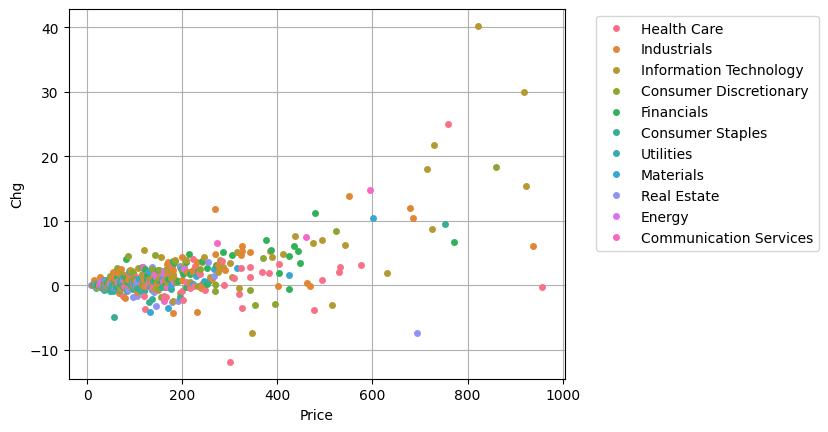

In [217]:
#Scatterplot

categories = list(unique_industries_list)
price_list = list(merged_df['Price'])
changes_list = list(merged_df['Chg'])
print(changes_list)
ax = sns.stripplot(merged_df, x="Price", y='Chg', hue ='GICS Sector',native_scale=True)
plt.legend(bbox_to_anchor = (1.05, 1.0), loc ='upper left')
plt.grid()

plt.show()

<Axes: xlabel='Price', ylabel='GICS Sector'>

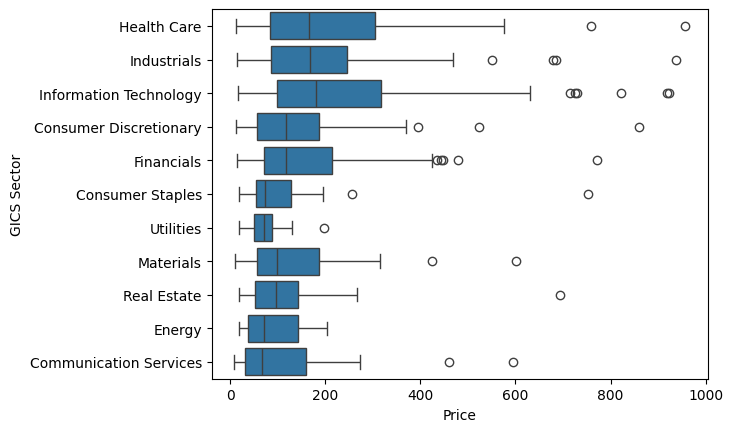

In [218]:
#BotPlot

sns.boxplot(merged_df, x='Price', y="GICS Sector" , fill= True, native_scale=True)

In [219]:
basic_info = {
    'Price' : mean_price ,
    'Change': mean_change,
    'Number of Industries': num_unique_industries,
    'Number of Sub-Industries' : num_unique_sub_industries,
    'Market Capitalization' : market_cap_number
}

df4 = pd.DataFrame(data=basic_info, index=[0])

In [220]:
#Output the data to Excel
filename = 'S&P500file3.xlsx'
relative_path = "./30 April 2024/" + filename
with pd.ExcelWriter(filename, mode='w', engine ='openpyxl') as writer:
    merged_df.to_excel(writer, sheet_name="marged_df", index= False)
    df4.to_excel(writer, sheet_name="Basic Info", index=False)

OSError: [Errno 22] Invalid argument: 'S&P500file3.xlsx'